# Constraint Satisfaction Problems with Propositional Logic

## Requirement

- Given a m x n matrix, each cell consists of a non-negative integer or it is blank.
- Each cell has 9 "**adjacent**" neighbors, including itself and 8 cells around.
- The player color cells by red or green colors so that the number of green cells which are "**adjacent**" to a cell matches the number inside.
- There is no constraint for blank cells.

    <img src="demo.png" alt="alt text" height="300">

- Using **proposition logic** and the **Glucose3** module of **PySat** to solve the given problem:
  - Assign a propositional symbol to each cell (true -> green, false -> red).
  - Enumerate cells to generate **CNF** clauses representing constraints.
  - Discover the general rule to generate clauses and eliminate redundant clauses.
  - Find a model satisfying all clauses using **Glucose3** of **PySat**

- Implement a function to evaluate the result matrix and illustrate it on the console screen with colors.
- Organize the program regarding to the OOP model, ensure source code is compact and reasonable.

## Solution

In [24]:
from itertools import combinations
from pysat.formula import CNF
from pysat.solvers import Glucose3
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

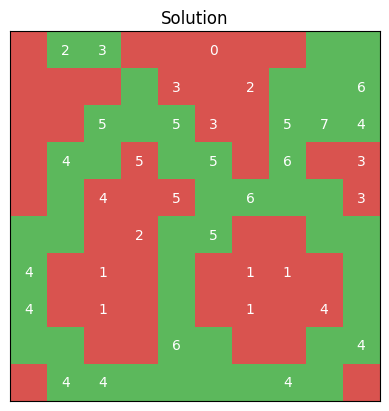

In [25]:
class Matrix:
    def __init__(self, matrix):
        self.matrix = matrix
        self.rows = len(matrix)
        self.cols = len(matrix[0])
        self.formula = CNF()

    def __get_adj(self, r, c):
        adj = []
        for i in range(max(0, r - 1), min(self.rows, r + 2)):
            for j in range(max(0, c - 1), min(self.cols, c + 2)):
                adj.append((i, j))
        return adj

    def __cell_to_var(self, r, c):
        return r * self.cols + c + 1

    def solve(self):
        """
        Generates the CNF formula for the puzzle constraints and solves it.
        """
        for r in range(self.rows):
            for c in range(self.cols):
                if self.matrix[r][c] is not None:
                    k = self.matrix[r][c]
                    adj_cells = self.__get_adj(r, c)
                    adj_vars = [self.__cell_to_var(i, j) for i, j in adj_cells]

                    for combo in combinations(adj_vars, k + 1):
                        self.formula.append([-x for x in combo])

                    for combo in combinations(adj_vars, len(adj_vars) - k + 1):
                        self.formula.append(list(combo))

        with Glucose3(bootstrap_with=self.formula) as solver:
            if solver.solve():
                model = solver.get_model()
                result = [[0] * self.cols for _ in range(self.rows)]
                for var in model:
                    if var > 0:
                        row = (var - 1) // self.cols
                        col = (var - 1) % self.cols
                        result[row][col] = 1
                return result
            else:
                return None

    def display(self, result):
        """
        Displays the result with Matplotlib.
        """
        if result is None:
            print("No solution found.")
            return

        cmap = ListedColormap(['#d9534f', '#5cb85c'])
        fig, ax = plt.subplots()
        ax.imshow(result, cmap=cmap)

        for r in range(self.rows):
            for c in range(self.cols):
                if self.matrix[r][c] is not None:
                    ax.text(c, r, self.matrix[r][c],
                            ha="center", va="center", color="w", fontsize=10)

        print()
        ax.set_xticks([])
        ax.set_yticks([])
        plt.title("Solution")
        plt.show()

if __name__ == '__main__':
    given_matrix = [
        [None, 2,    3,    None, None, 0,    None, None, None, None],
        [None, None, None, None, 3,    None, 2,    None, None, 6],
        [None, None, 5,    None, 5,    3,    None, 5,    7,    4],
        [None, 4,    None, 5,    None, 5,    None, 6,    None, 3],
        [None, None, 4,    None, 5,    None, 6,    None, None, 3],
        [None, None, None, 2,    None, 5,    None, None, None, None],
        [4,    None, 1,    None, None, None, 1,    1,    None, None],
        [4,    None, 1,    None, None, None, 1,    None, 4,    None],
        [None, None, None, None, 6,    None, None, None, None, 4],
        [None, 4,    4,    None, None, None, None, 4,    None, None],
    ]

    matrix = Matrix(given_matrix)
    solution = matrix.solve()
    matrix.display(solution)
